# ***Feature Engineering***

## **Handling Missing Values**

In [1]:
import seaborn as sns
import numpy as np 
import pandas as pd

In [2]:
df = sns.load_dataset('titanic')

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df.shape

(891, 15)

In [6]:
df.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [10]:
df.dropna().shape

(182, 15)

so, we can't drop all rows where there is some null value coz most of the data has null values.Let's check for columns

In [12]:
df.dropna(axis=1)

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


It will drop columns where there is atleast one missing value.

## Imputation Missing Values
### 1- Mean Value Imputation

<Axes: xlabel='age', ylabel='Count'>

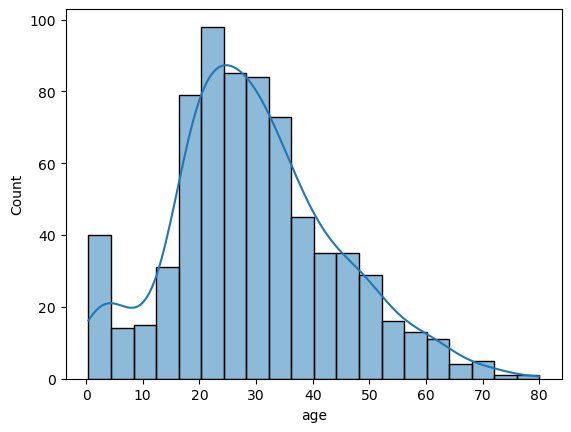

In [13]:
sns.histplot(df['age'], kde=True)

it is somewhat like normal distribution so we can replace null values by mean

In [14]:
df['Age_mean'] = df['age'].fillna(df['age'].mean())

In [15]:
df[['Age_mean','age']]

,Age_mean,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


<Axes: xlabel='Age_mean', ylabel='Count'>

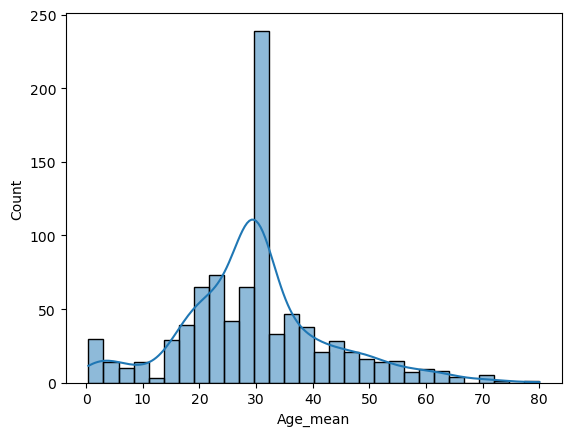

In [16]:
sns.histplot(df['Age_mean'], kde=True)

mean value imputation is used when data is normally distributed. But if data is right/left skewed i.e. outliers present

### Median Value Imputation

In [17]:
df['Age_median'] = df['age'].fillna(df['age'].median())
df[['Age_mean','Age_median','age']]

,Age_mean,Age_median,age
0,22.000000,22.0,22.0
1,38.000000,38.0,38.0
2,26.000000,26.0,26.0
3,35.000000,35.0,35.0
4,35.000000,35.0,35.0
...,...,...,...
886,27.000000,27.0,27.0
887,19.000000,19.0,19.0
888,29.699118,28.0,NaN
889,26.000000,26.0,26.0


<Axes: xlabel='Age_median', ylabel='Count'>

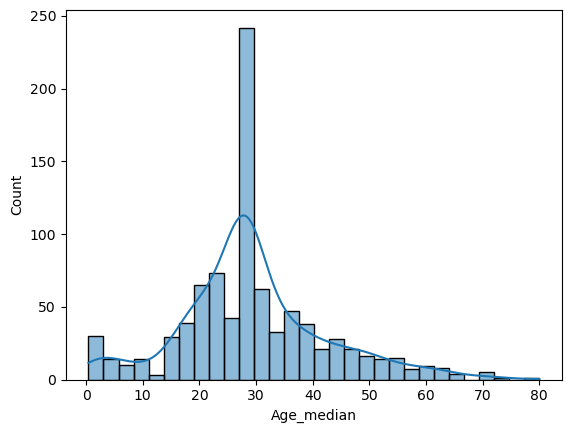

In [18]:
sns.histplot(df['Age_median'], kde=True)

### Mode Value Imputation

In [19]:
df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Age_mean,Age_median
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


embarked is an examply of MCAR

In [20]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

it is a categorical data and obviously less missing values

In [4]:
mode_value = df[df['embarked'].notna()]['embarked'].mode()
mode_value[0]
# df[df['embarked'].notna()]

'S'

In [29]:
df['Embarked_mode'] = df['embarked'].fillna(mode_value)

In [30]:
df[['Embarked_mode','embarked']]

,Embarked_mode,embarked
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
...,...,...
886,S,S
887,S,S
888,S,S
889,C,C


## Random Sampling
* selecting the random value from the column and replace with the null values

In [37]:
df['Random_embarked'] = df['embarked'].fillna(df.sample()['embarked'].iloc[0])

In [42]:
df[['Embarked_mode','Random_embarked', 'embarked']]


,Embarked_mode,Random_embarked,embarked
0,S,S,S
1,C,C,C
2,S,S,S
3,S,S,S
4,S,S,S
...,...,...,...
886,S,S,S
887,S,S,S
888,S,S,S
889,C,C,C


## **Handling Imbalance Dataset**
1. UpSampling
2. DownSampling

### **Upsampling**

In [46]:
#  

import numpy as numpy
import pandas as pd
# set random seet for reproducibility
np.random.seed(123)

# create a datframe with two classes
n_samples = 1000
class_0_ration = 0.9
n_class_0 = int(n_samples*class_0_ration)
n_class_1 = n_samples-n_class_0
n_class_0, n_class_1

(900, 100)

In [48]:
# create dataframe with imbalance datapoints
class_0 = pd.DataFrame({
    'feature_1' : np.random.normal(loc=0, scale = 1, size = n_class_0),
    'feature_2' : np.random.normal(loc=0, scale = 1, size = n_class_0),
    'target' : [0]*n_class_0
})
class_1 = pd.DataFrame({
    'feature_1' : np.random.normal(loc=0, scale = 1, size = n_class_1),
    'feature_2' : np.random.normal(loc=0, scale = 1, size = n_class_1),
    'target' : [1]*n_class_1
})


In [53]:
df = pd.concat([class_0, class_1]).reset_index(drop=True)

In [58]:
df['target'].value_counts()

0    900
1    100
Name: target, dtype: int64

In [60]:
df_majority = df[df['target']==0]
df_minority = df[df['target']==1]

`from sklearn.utils import resample ` -> resample
* it extrapolates the points, whatever points are minority, it will try to create more new points for this.and it will try to equalize with respect to majority.

In [66]:
from sklearn.utils import resample
df_minority_upsampled = resample(df_minority, replace=True,
         n_samples=len(df_majority),
         random_state=42
         )

In [62]:
df_minority_upsampled.shape

(900, 3)

In [64]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
df_upsampled

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0
...,...,...,...
952,-0.811098,0.189189,1
965,1.919526,-0.019459,1
976,0.810326,1.604614,1
942,1.621531,0.168229,1


In [65]:
df_upsampled['target'].value_counts()

0    900
1    900
Name: target, dtype: int64

### **DownSampling**

In [67]:
df_majority = df[df['target']==0]
df_minority = df[df['target']==1]

In [69]:
df_majority_downsampled = resample(df_majority, replace=True,
         n_samples=len(df_minority),
         random_state=42
         )
df_majority_downsampled.shape

(100, 3)

In [73]:
df_downsampled = pd.concat([df_minority, df_majority_downsampled])
df_downsampled

,feature_1,feature_2,target
900,-0.300232,0.139033,1
901,-0.632261,0.025577,1
902,-0.204317,-0.196443,1
903,0.213696,1.312255,1
904,1.033878,1.187417,1
...,...,...,...
201,-0.598105,1.575650,0
269,0.420180,0.570631,0
862,-0.392309,0.446491,0
815,-0.148405,-0.457929,0


In [74]:
df_downsampled['target'].value_counts()

1    100
0    100
Name: target, dtype: int64

## **SMOTE**

In [79]:
from sklearn.datasets import make_classification 
x,y = make_classification(n_samples = 1000, n_features = 2, n_clusters_per_class = 1,
                    weights=[0.90],n_redundant=0, random_state=12)

In [80]:
df1 = pd.DataFrame(x,columns = ['f1','f2'])
df2 = pd.DataFrame(y, columns = ['target'] )
final_df = pd.concat([df1,df2], axis = 1)
final_df

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0
...,...,...,...
995,-0.712495,-0.880452,0
996,-2.625830,-2.827891,0
997,-1.326439,-1.815178,0
998,-0.833486,-0.514647,0


In [81]:
final_df['target'].value_counts()

0    900
1    100
Name: target, dtype: int64

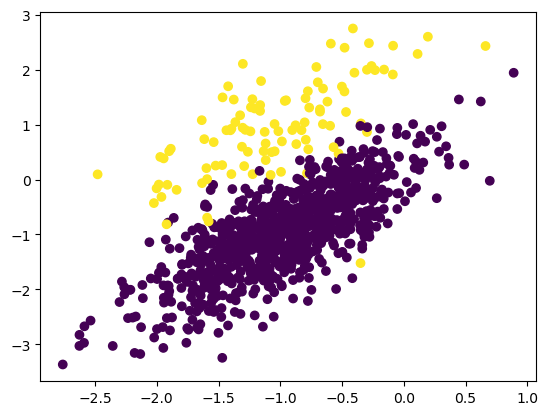

In [82]:
import matplotlib.pyplot as plt 
plt.scatter(final_df['f1'], final_df['f2'], c=final_df['target'])

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x,y = oversample.fit_resample(final_df[['f1','f2']], final_df['target'])

In [92]:
x.shape

(1000, 2)

In [93]:
y.shape

(1000,)

In [95]:
len(y[y==0])

900

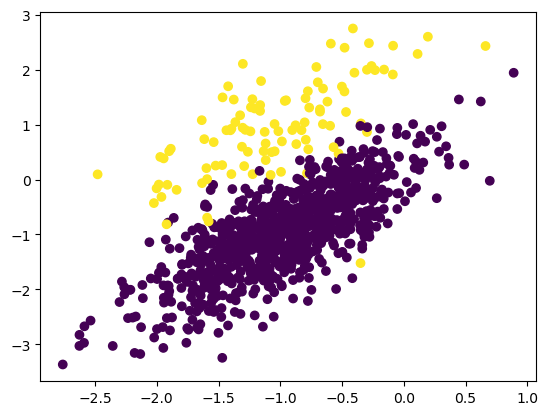

In [96]:
df1 = pd.DataFrame(x,columns = ['f1','f2'])
df2 = pd.DataFrame(y, columns = ['target'] )
final_df = pd.concat([df1,df2], axis = 1)
plt.scatter(final_df['f1'], final_df['f2'], c=final_df['target'])

## **Data Interpolation**

### Linear Interpolation

In [1]:
import numpy as np
x = np.array([1,2,3,4,5])
y = np.array([2,4,6,8,10])

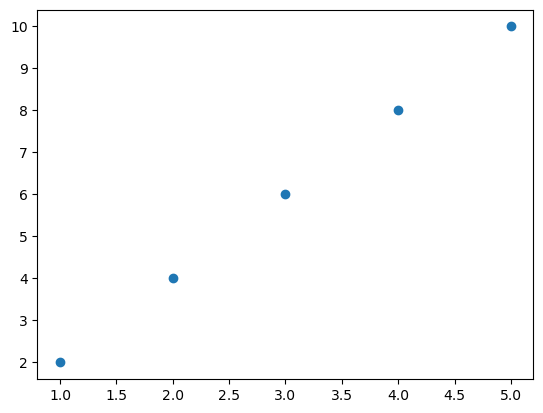

In [2]:
import matplotlib.pyplot as plt 
plt.scatter(x,y)

In [6]:
#  interpolate the data using linear interpolation 
# only for 1-D data
x_new = np.linspace(1,5,20)
y_new = np.interp(x_new, x,y)

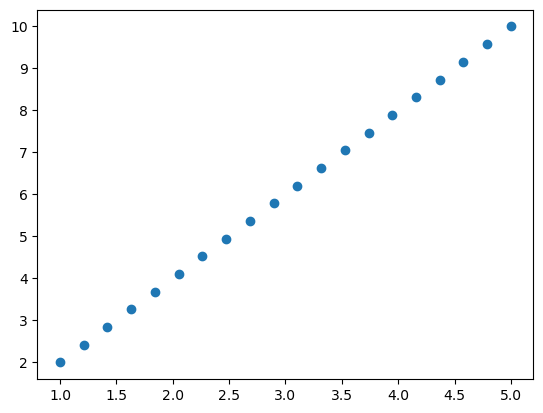

In [7]:
plt.scatter(x_new, y_new)

### Cubic Interpolation using scipy

In [8]:
import numpy as np 
x = np.array([1,2,3,4,5])
y = np.array([1,8,27,64,125])

In [9]:
from scipy.interpolate import interp1d

In [10]:
f = interp1d(x,y,kind='cubic')

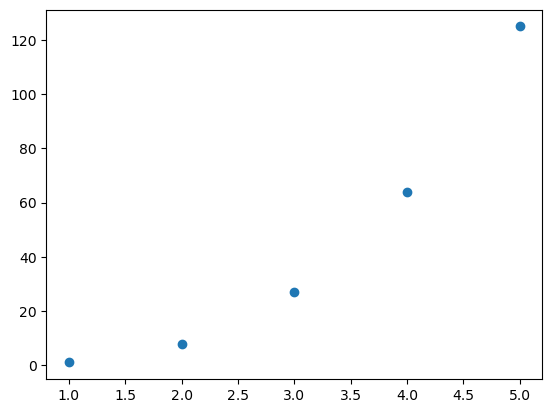

In [12]:
x_new = np.linspace(1,5,10)
y_new = f(x_new)
plt.scatter(x, y)

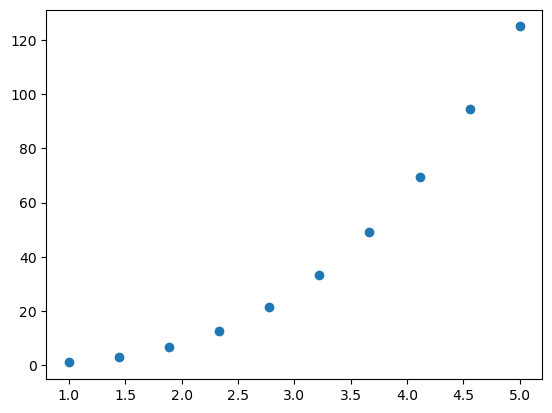

In [13]:
plt.scatter(x_new, y_new)

### Polynomial Interpolation

In [17]:
import numpy as np 
x = np.array([1,2,3,4,5])
y = np.array([1,4,9,16,25])
p = np.polyfit(x,y,2)
# 2 - for sq, 3 - cubic eqn, 4 for x^4 vala eqn and so on
x_new = np.linspace(1,5,10)
y_new = np.polyval(p,x_new)

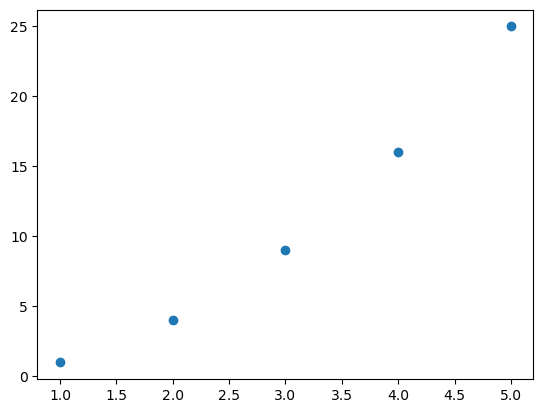

In [18]:
plt.scatter(x, y)

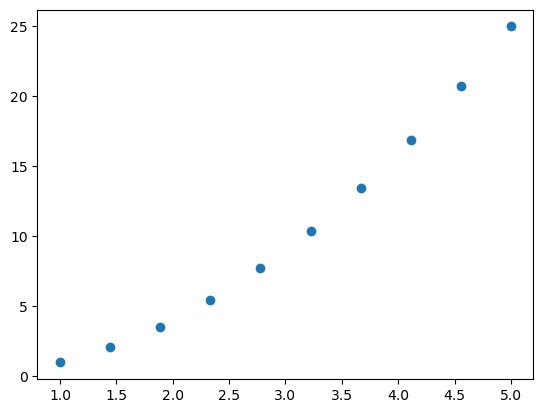

In [19]:
plt.scatter(x_new, y_new)

## **Feature Scaling**
1. Standardisation
2. Normalization
3. Unit Vector

### Standardization

In [1]:
import seaborn as sns

In [2]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
# apply standardization on total_bill
import numpy as np
mean = np.mean(df['total_bill'])
stdn = np.std(df['total_bill'])
mean, stdn

(19.78594262295082, 8.88415057777113)

In [4]:
df['total_bill_standardization'] = (df['total_bill'] - mean)/stdn

In [5]:
df[['total_bill','total_bill_standardization']]

,total_bill,total_bill_standardization
0,16.99,-0.314711
1,10.34,-1.063235
2,21.01,0.137780
3,23.68,0.438315
4,24.59,0.540745
...,...,...
239,29.03,1.040511
240,27.18,0.832275
241,22.67,0.324630
242,17.82,-0.221287


<Axes: xlabel='total_bill', ylabel='Count'>

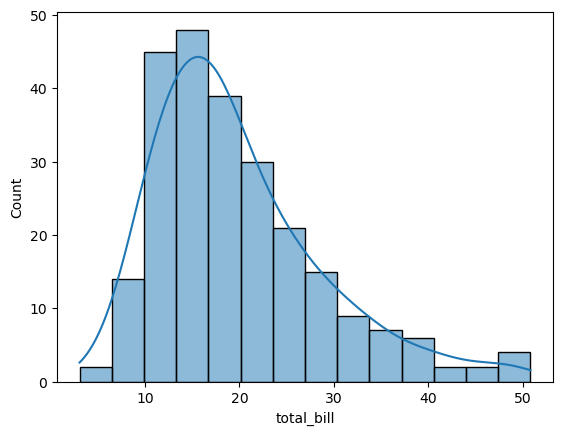

In [10]:
sns.histplot(df['total_bill'], kde = True)

<Axes: xlabel='total_bill_standardization', ylabel='Count'>

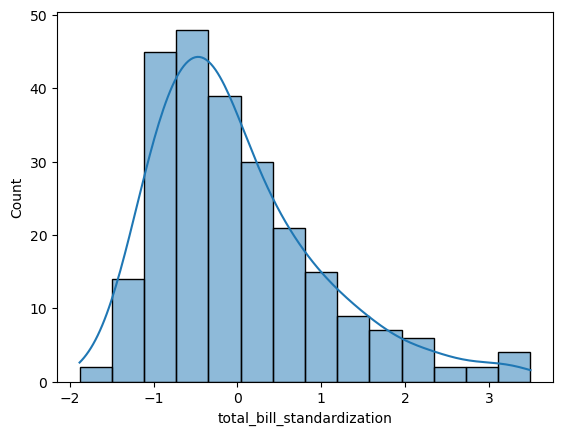

In [9]:
sns.histplot(df['total_bill_standardization'], kde = True)

In [11]:
# using sklearn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler

StandardScaler()

In [13]:
scaler.fit(df[['total_bill']]) # it will compute mean and standard deviation 
# remember this fit() will always take data in poly dimension not in one dimension

StandardScaler()

In [14]:
scaler.transform(df[['total_bill']]) #it will start scaling and applying transform data

array([[-3.14711305e-01],
       [-1.06323531e+00],
       [ 1.37779900e-01],
       [ 4.38315103e-01],
       [ 5.40744704e-01],
       [ 6.19536705e-01],
       [-1.23995452e+00],
       [ 7.98507107e-01],
       [-5.34203307e-01],
       [-5.63468908e-01],
       [-1.07111451e+00],
       [ 1.74175992e+00],
       [-4.91430507e-01],
       [-1.52624903e-01],
       [-5.57840908e-01],
       [ 2.01939101e-01],
       [-1.06436091e+00],
       [-3.93503306e-01],
       [-3.16962505e-01],
       [ 9.72582994e-02],
       [-2.10030504e-01],
       [ 5.67366990e-02],
       [-4.52034507e-01],
       [ 2.21000952e+00],
       [ 3.83349840e-03],
       [-2.22412104e-01],
       [-7.22178510e-01],
       [-7.98719310e-01],
       [ 2.15446301e-01],
       [-1.53017018e-02],
       [-1.15215771e+00],
       [-1.61629703e-01],
       [-5.31952107e-01],
       [ 1.01760699e-01],
       [-2.25788904e-01],
       [ 4.81087904e-01],
       [-3.91252106e-01],
       [-3.21464905e-01],
       [-1.2

In [15]:
scaler.fit_transform(df[['total_bill']])  # fit and transform using one function
# it will always take 2 d data

array([[-3.14711305e-01],
       [-1.06323531e+00],
       [ 1.37779900e-01],
       [ 4.38315103e-01],
       [ 5.40744704e-01],
       [ 6.19536705e-01],
       [-1.23995452e+00],
       [ 7.98507107e-01],
       [-5.34203307e-01],
       [-5.63468908e-01],
       [-1.07111451e+00],
       [ 1.74175992e+00],
       [-4.91430507e-01],
       [-1.52624903e-01],
       [-5.57840908e-01],
       [ 2.01939101e-01],
       [-1.06436091e+00],
       [-3.93503306e-01],
       [-3.16962505e-01],
       [ 9.72582994e-02],
       [-2.10030504e-01],
       [ 5.67366990e-02],
       [-4.52034507e-01],
       [ 2.21000952e+00],
       [ 3.83349840e-03],
       [-2.22412104e-01],
       [-7.22178510e-01],
       [-7.98719310e-01],
       [ 2.15446301e-01],
       [-1.53017018e-02],
       [-1.15215771e+00],
       [-1.61629703e-01],
       [-5.31952107e-01],
       [ 1.01760699e-01],
       [-2.25788904e-01],
       [ 4.81087904e-01],
       [-3.91252106e-01],
       [-3.21464905e-01],
       [-1.2

In [18]:
import pandas as pd 
pd.DataFrame(scaler.fit_transform(df[['total_bill']]), columns = ['total_bill'])

,total_bill
0,-0.314711
1,-1.063235
2,0.137780
3,0.438315
4,0.540745
...,...
239,1.040511
240,0.832275
241,0.324630
242,-0.221287


In [19]:
import pandas as pd 
pd.DataFrame(scaler.fit_transform(df[['total_bill','tip']]), columns = ['total_bill','tip'])

,total_bill,tip
0,-0.314711,-1.439947
1,-1.063235,-0.969205
2,0.137780,0.363356
3,0.438315,0.225754
4,0.540745,0.443020
...,...,...
239,1.040511,2.115963
240,0.832275,-0.722971
241,0.324630,-0.722971
242,-0.221287,-0.904026


In [27]:
scaler.transform([[13,14],[45,57]])

c:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.76382571,  7.96764316],
       [ 2.83809433, 39.10901153]])

### Normalization - Min Max Scaler

In [24]:
df = sns.load_dataset('taxis')
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [25]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
min_max.fit_transform(df[['distance','fare','tip']])

array([[0.04359673, 0.04026846, 0.06475904],
       [0.02152589, 0.02684564, 0.        ],
       [0.0373297 , 0.04362416, 0.07108434],
       ...,
       [0.11280654, 0.10067114, 0.        ],
       [0.03051771, 0.03355705, 0.        ],
       [0.10490463, 0.09395973, 0.10120482]])

### Unit Vector

In [29]:
from sklearn.preprocessing import normalize
df1 = pd.DataFrame(normalize(df[['distance','fare','tip']]),columns = ['distance','fare','tip'])

In [30]:
df1.head()

,distance,fare,tip
0,0.213461,0.933894,0.286839
1,0.156064,0.987747,0.000000
2,0.171657,0.939731,0.295702
3,0.267899,0.939386,0.213971
4,0.231742,0.965592,0.118017


## **Data Encoding**
1. Nominal/OHE encoding
2. Label and Ordinal Encoding
3. Target guided ordinal Encoding

In [31]:
import pandas as pd 
from sklearn.preprocessing import OneHotEncoder
df = pd.DataFrame({
    'color' : ['red','blue','green','green','red','blue']
})
df.head()

,color
0,red
1,blue
2,green
3,green
4,red


In [35]:
# create an instance of OHE
encoder = OneHotEncoder()
# perform fit and transform
encoded = encoder.fit_transform(df[['color']]).toarray()

In [36]:
encoder_df = pd.DataFrame(encoded, columns = encoder.get_feature_names_out())

In [37]:
encoder_df

,color_blue,color_green,color_red
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0
5,1.0,0.0,0.0


In [38]:
pd.concat([df, encoder_df], axis = 1)

,color,color_blue,color_green,color_red
0,red,0.0,0.0,1.0
1,blue,1.0,0.0,0.0
2,green,0.0,1.0,0.0
3,green,0.0,1.0,0.0
4,red,0.0,0.0,1.0
5,blue,1.0,0.0,0.0


In [ ]:
sns.load_dataset('tips') # do OHE on this.

### Label and Ordinal Encoding

In [39]:
df

,color
0,red
1,blue
2,green
3,green
4,red
5,blue


In [40]:
from sklearn.preprocessing import LabelEncoder
lbl_encoder = LabelEncoder()
lbl_encoder.fit_transform(df[['color']])

c:\Users\Dell\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([2, 0, 1, 1, 2, 0])

In [41]:
lbl_encoder.transform([['red']])

c:\Users\Dell\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


array([2])

### Ordinal Encoding

In [42]:
from sklearn.preprocessing import OrdinalEncoder
df = pd.DataFrame({'size':['small','medium','large','medium','small','large']})
df

,size
0,small
1,medium
2,large
3,medium
4,small
5,large


In [54]:
encoder = OrdinalEncoder(categories=[['small','medium','large']])
enc = encoder.fit_transform(df[['size']])
enc_df = pd.DataFrame(enc, columns = encoder.get_feature_names_out())
pd.concat([df,enc_df], axis=1)

,size,size
0,small,0.0
1,medium,1.0
2,large,2.0
3,medium,1.0
4,small,0.0
5,large,2.0


### Traget Guided Ordinal Encoding

In [1]:
import pandas as pd

In [2]:
df = pd.DataFrame({'city' : ['New York', 'London', 'Paris', 'Tokyo', 'New York', 'Paris'],
    'price': [200, 150, 300, 250, 180, 320]})

In [3]:
df

,city,price
0,New York,200
1,London,150
2,Paris,300
3,Tokyo,250
4,New York,180
5,Paris,320


In [7]:
city_meanprice_dict = df.groupby('city')['price'].mean().to_dict()

In [8]:
df['city_encoded'] = df['city'].map(city_meanprice_dict)
df

,city,price,city_encoded
0,New York,200,190.0
1,London,150,150.0
2,Paris,300,310.0
3,Tokyo,250,250.0
4,New York,180,190.0
5,Paris,320,310.0


In [14]:
import seaborn as sns
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [23]:
day_mean = df.groupby(['day'])['total_bill'].mean().to_dict()
day_mean

{'Thur': 17.682741935483868,
 'Fri': 17.15157894736842,
 'Sat': 20.44137931034483,
 'Sun': 21.41}

In [24]:
df['day_price'] = df['day'].map(day_mean)

In [25]:
df

,total_bill,tip,sex,smoker,day,time,size,day_price
0,16.99,1.01,Female,No,Sun,Dinner,2,21.410000
1,10.34,1.66,Male,No,Sun,Dinner,3,21.410000
2,21.01,3.50,Male,No,Sun,Dinner,3,21.410000
3,23.68,3.31,Male,No,Sun,Dinner,2,21.410000
4,24.59,3.61,Female,No,Sun,Dinner,4,21.410000
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,20.441379
240,27.18,2.00,Female,Yes,Sat,Dinner,2,20.441379
241,22.67,2.00,Male,Yes,Sat,Dinner,2,20.441379
242,17.82,1.75,Male,No,Sat,Dinner,2,20.441379
